In [361]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [362]:
df = pd.read_csv("Train.csv")

In [363]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [364]:
df.shape

(8523, 12)

In [365]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [366]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Exploratory Data Analysis

As we can observe, all the column names are listed in the output.

Item_Identifier column is referenced as Unique Product ID.The remaining columns appear to be our features, with the last column being the response variable.

* Item_Weight: Represents the weight of the product in floating values.
* Item_Fat_Content: Categorical Data which tells whether the product is low fat or not.
* Item_Visibility: The percentage of total display area all the products in a store.
* Item_Type: The Category to which the product belongs.
* Item_MRP: MRP of the products.
* Outlet_Identifier:Unique store ID.
* Outlet_Establishment_Year: Year in which the store was established.
* Outlet_Size: Size of the Store.
* Outlet_Location_Type: Type of City the store is located.
* Outlet_Type: Whether the store is a grocery sotre or a super market.
* Item_Outlet_Sales: The Sales of the product in a particular store.

In [367]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [368]:
# Finding out the missing values for all the columns
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [369]:
# Displaying the Unique data for each column
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

# Evaluating the Categorical Features

In [370]:
print('Frequency of Categories for varible Item ID')
id_counts = df['Item_Identifier'].value_counts()
id_counts.head()

Frequency of Categories for varible Item ID


Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
Name: count, dtype: int64

In [371]:
print('Frequency of Categories for varible Item_Fat_Content')
df['Item_Fat_Content'].value_counts()

Frequency of Categories for varible Item_Fat_Content


Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

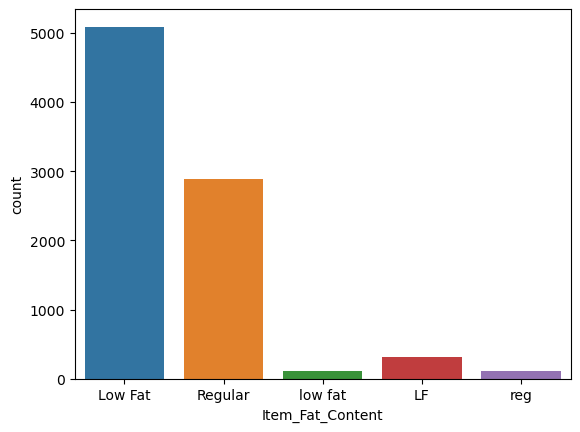

In [372]:
sns.countplot(data=df,x='Item_Fat_Content')

In [373]:
print('Frequency of Categories for varible Item_Type')
df['Item_Type'].value_counts()

Frequency of Categories for varible Item_Type


Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

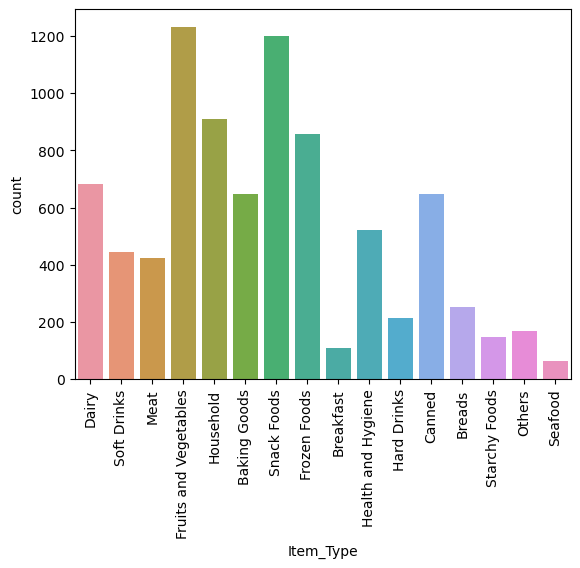

In [374]:
sns.countplot(data=df,x='Item_Type')
plt.xticks(rotation=90)

In [375]:
Item_Type_and_fat_counts = df.groupby(["Item_Fat_Content","Item_Type"]).size()
print(Item_Type_and_fat_counts)

Item_Fat_Content  Item_Type            
LF                Baking Goods             20
                  Breads                    8
                  Breakfast                 2
                  Canned                   17
                  Dairy                    24
                                           ..
reg               Fruits and Vegetables    25
                  Meat                      7
                  Snack Foods              23
                  Soft Drinks               1
                  Starchy Foods             7
Length: 70, dtype: int64


In [376]:
print('Frequency of Categories for varible Outlet ID')
outlet_id_counts = df['Outlet_Identifier'].value_counts()
outlet_id_counts

Frequency of Categories for varible Outlet ID


Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count, dtype: int64

In [377]:
print('Frequency of Categories for varible Outlet_Location_Type')
df['Outlet_Location_Type'].value_counts()

Frequency of Categories for varible Outlet_Location_Type


Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

<Axes: xlabel='Outlet_Location_Type', ylabel='count'>

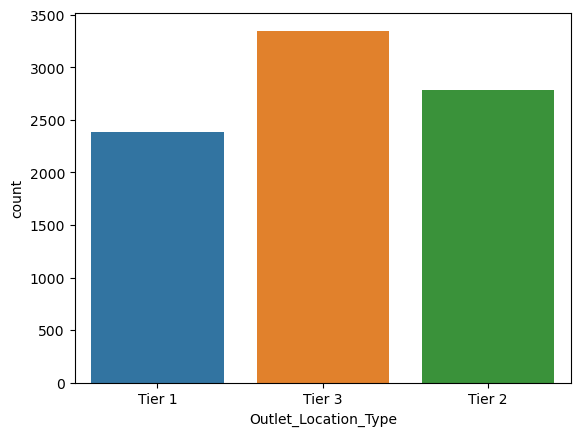

In [378]:
sns.countplot(data=df,x='Outlet_Location_Type')

In [379]:
print('Frequency of Categories for varible Outlet_Size')
df['Outlet_Size'].value_counts()

Frequency of Categories for varible Outlet_Size


Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

<Axes: xlabel='Outlet_Size', ylabel='count'>

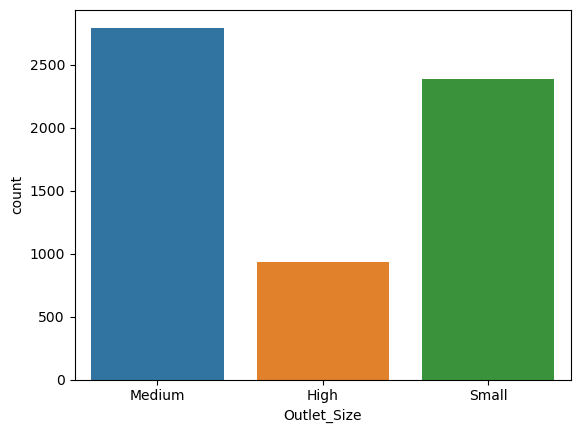

In [380]:
sns.countplot(data=df,x='Outlet_Size')

In [381]:
print('Frequency of Categories for varible Outlet_Type')
df['Outlet_Type'].value_counts()

Frequency of Categories for varible Outlet_Type


Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

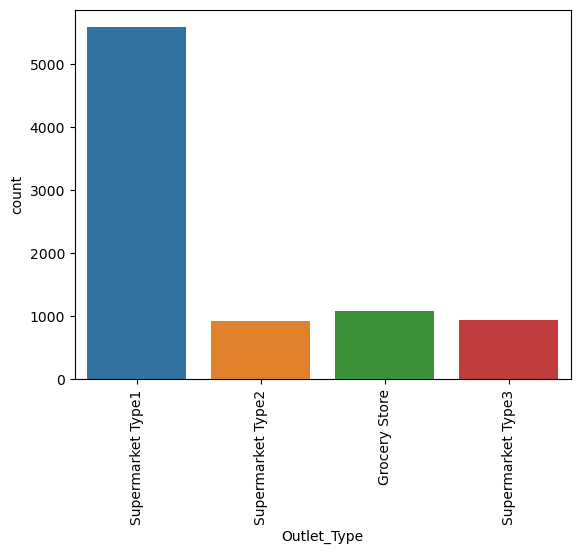

In [382]:
sns.countplot(data=df,x='Outlet_Type')
plt.xticks(rotation=90)

In [383]:
Outlet_Location_Type_counts = df.groupby(["Outlet_Location_Type","Outlet_Identifier","Outlet_Type"]).size()
print(Outlet_Location_Type_counts)

Outlet_Location_Type  Outlet_Identifier  Outlet_Type      
Tier 1                OUT019             Grocery Store        528
                      OUT046             Supermarket Type1    930
                      OUT049             Supermarket Type1    930
Tier 2                OUT017             Supermarket Type1    926
                      OUT035             Supermarket Type1    930
                      OUT045             Supermarket Type1    929
Tier 3                OUT010             Grocery Store        555
                      OUT013             Supermarket Type1    932
                      OUT018             Supermarket Type2    928
                      OUT027             Supermarket Type3    935
dtype: int64


In [384]:
Outlet_Location_Type_counts = df.groupby(["Outlet_Type","Outlet_Size"]).size()
print(Outlet_Location_Type_counts)

Outlet_Type        Outlet_Size
Grocery Store      Small           528
Supermarket Type1  High            932
                   Medium          930
                   Small          1860
Supermarket Type2  Medium          928
Supermarket Type3  Medium          935
dtype: int64


# Visualizing the Relationship between Features and Response

<Axes: xlabel='Item_Outlet_Sales', ylabel='Count'>

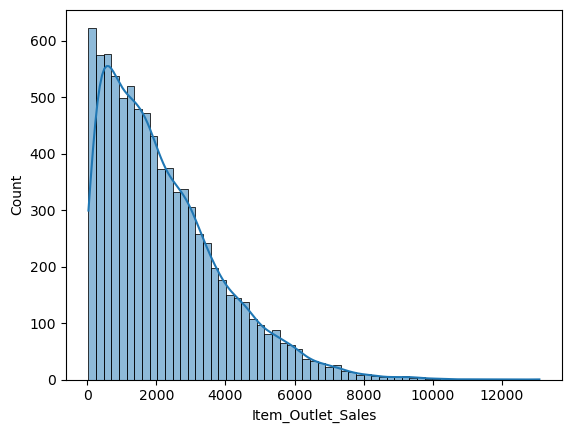

In [385]:
sns.histplot(data=df,x='Item_Outlet_Sales',kde=True)

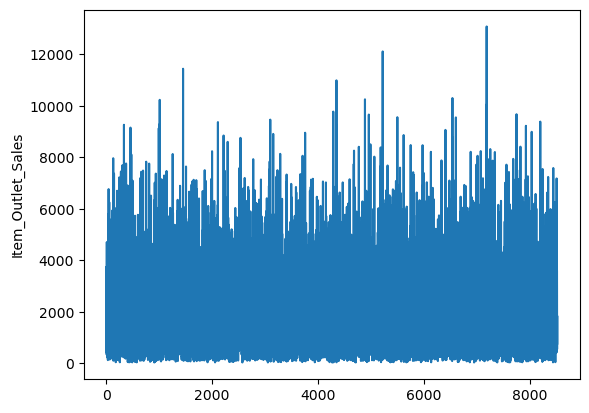

In [386]:
sns.lineplot(data=df,x=df.index, y='Item_Outlet_Sales')
plt.show()

<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

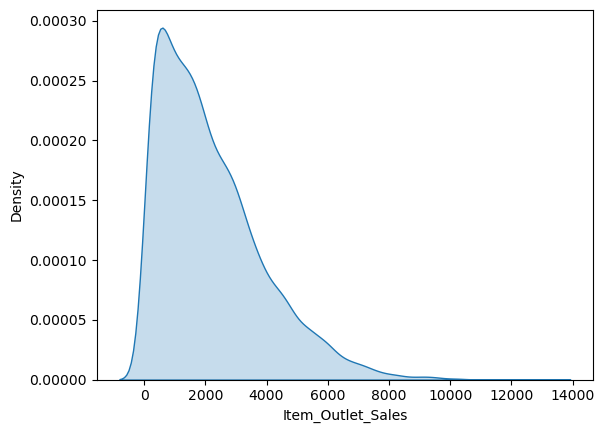

In [387]:
sns.kdeplot(data = df,x='Item_Outlet_Sales', fill = True)

In [388]:
print ("Skew is:", df.Item_Outlet_Sales.skew())
print("Kurtosis: %f" % df.Item_Outlet_Sales.kurt())

Skew is: 1.1775306028542796
Kurtosis: 1.615877


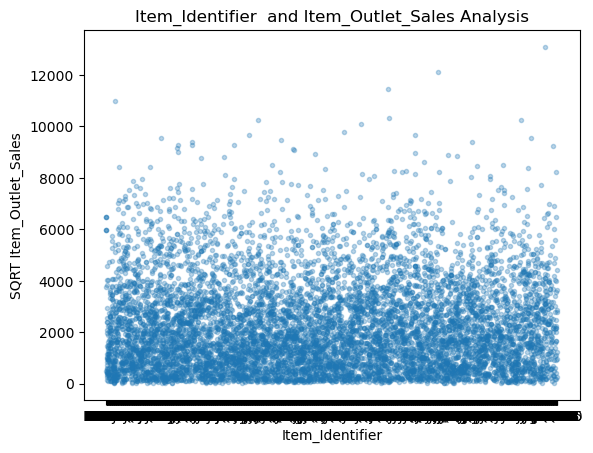

In [389]:
plt.xlabel("Item_Identifier")
plt.ylabel("SQRT Item_Outlet_Sales")
plt.title("Item_Identifier  and Item_Outlet_Sales Analysis")
plt.plot(df.Item_Identifier , df["Item_Outlet_Sales"],'.', alpha = 0.3)

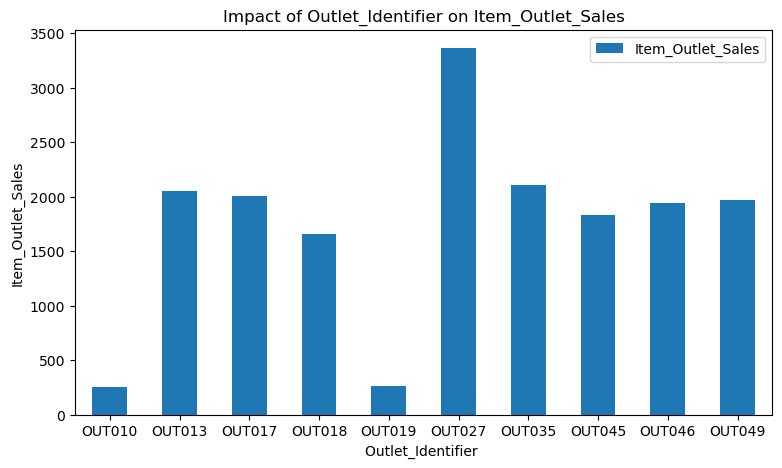

In [390]:
Outlet_Identifier_pivot = df.pivot_table(index='Outlet_Identifier', values="Item_Outlet_Sales", aggfunc=np.median)

Outlet_Identifier_pivot.plot(kind='bar',figsize=(9,5))
plt.xlabel("Outlet_Identifier ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Identifier on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

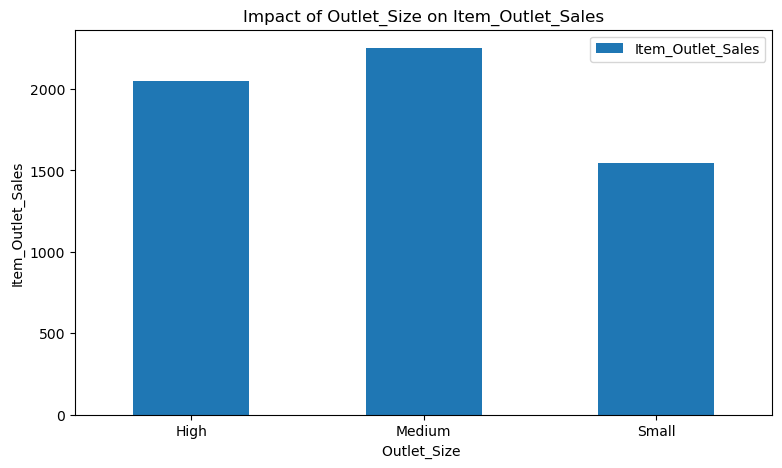

In [391]:
Outlet_Size_pivot = df.pivot_table(index='Outlet_Size', values="Item_Outlet_Sales", aggfunc=np.median) 

Outlet_Size_pivot.plot(kind='bar',figsize=(9,5))
plt.xlabel("Outlet_Size ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Size on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

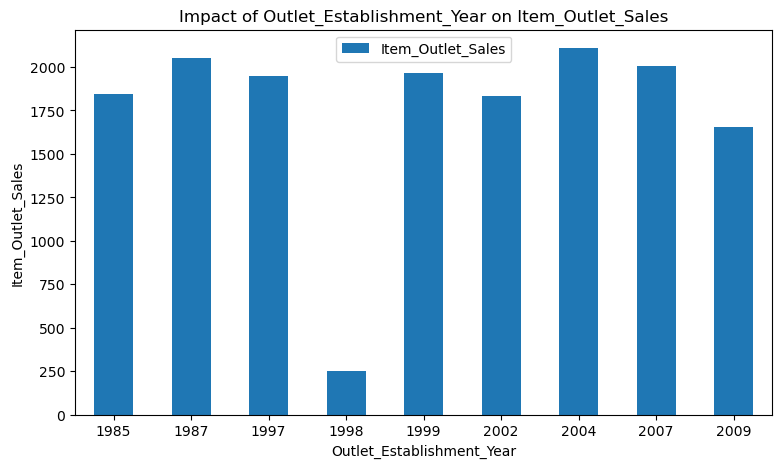

In [392]:
Outlet_Establishment_Year_pivot = \
df.pivot_table(index='Outlet_Establishment_Year', values="Item_Outlet_Sales", aggfunc=np.median)

Outlet_Establishment_Year_pivot.plot(kind='bar',figsize=(9,5))
plt.xlabel("Outlet_Establishment_Year")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Establishment_Year on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

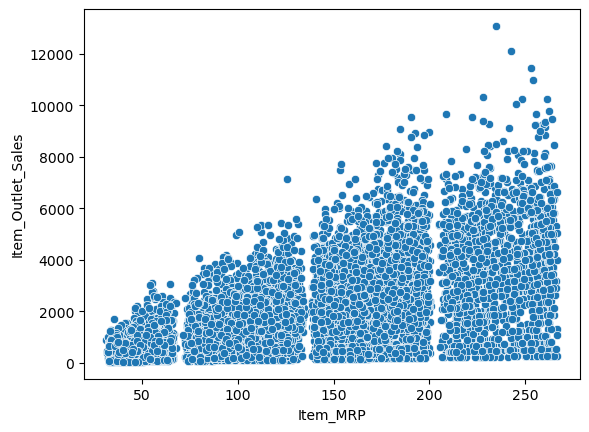

In [393]:
#This scatter plot show the variation of Item MRP vs Item Sales using scatter plot
sns.scatterplot(x = df['Item_MRP'], y = df['Item_Outlet_Sales'])
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')
plt.show()

<Axes: xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

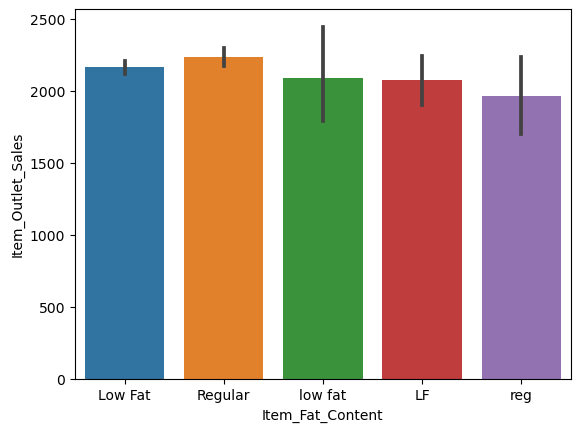

In [394]:
#This shows the variation of Item Fat Content vs Item Sales using bar plot
sns.barplot(x = df['Item_Fat_Content'],y = df['Item_Outlet_Sales'])

<Axes: xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

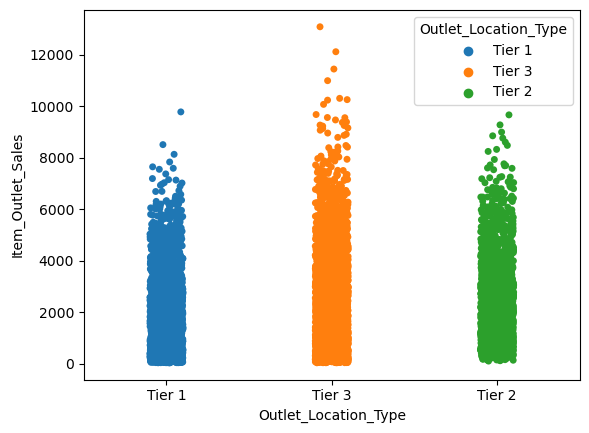

In [395]:
#This is a variation of outletlocation type vs sales using a swarm plot
sns.stripplot(data=df, x='Outlet_Location_Type',y = 'Item_Outlet_Sales', hue='Outlet_Location_Type')

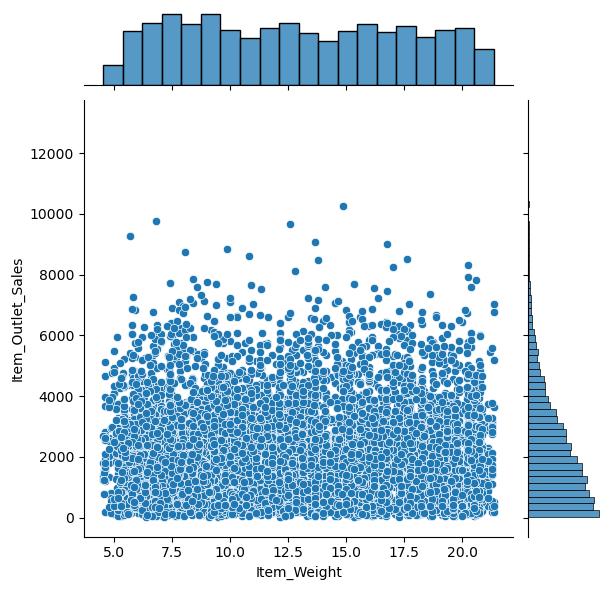

In [396]:
#A simple joint plot to visualize item MRP and outlet sales
sns.jointplot(data=df, x='Item_Weight',y='Item_Outlet_Sales')

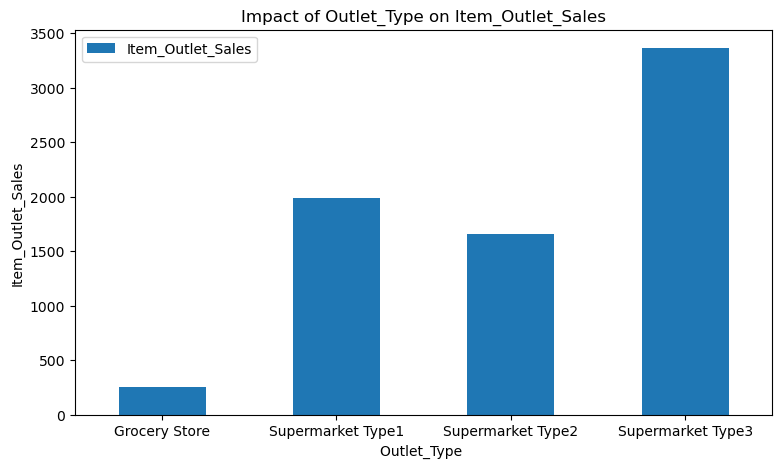

In [397]:
Outlet_Type_pivot = df.pivot_table(index='Outlet_Type', values="Item_Outlet_Sales", aggfunc=np.median)

Outlet_Type_pivot.plot(kind='bar',figsize=(9,5))
plt.xlabel("Outlet_Type ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

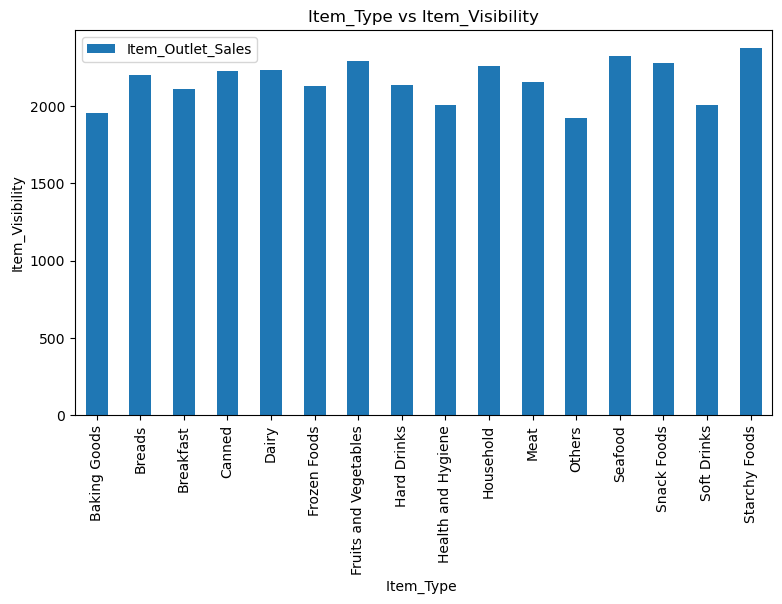

In [398]:
pivoTable = df.pivot_table(index='Item_Type', values="Item_Outlet_Sales", aggfunc=np.mean)

pivoTable.plot(kind='bar',figsize=(9,5))
plt.xlabel("Item_Type ")
plt.ylabel("Item_Visibility")
plt.title("Item_Type vs Item_Visibility")
plt.xticks(rotation=90)
plt.show()

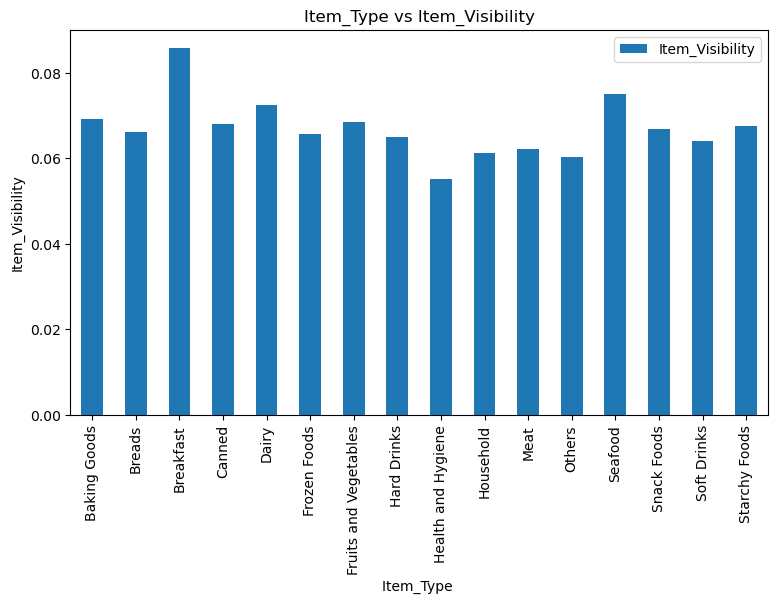

In [399]:
pivoTable = df.pivot_table(index='Item_Type', values="Item_Visibility", aggfunc=np.mean)

pivoTable.plot(kind='bar',figsize=(9,5))
plt.xlabel("Item_Type ")
plt.ylabel("Item_Visibility")
plt.title("Item_Type vs Item_Visibility")
plt.xticks(rotation=90)
plt.show()


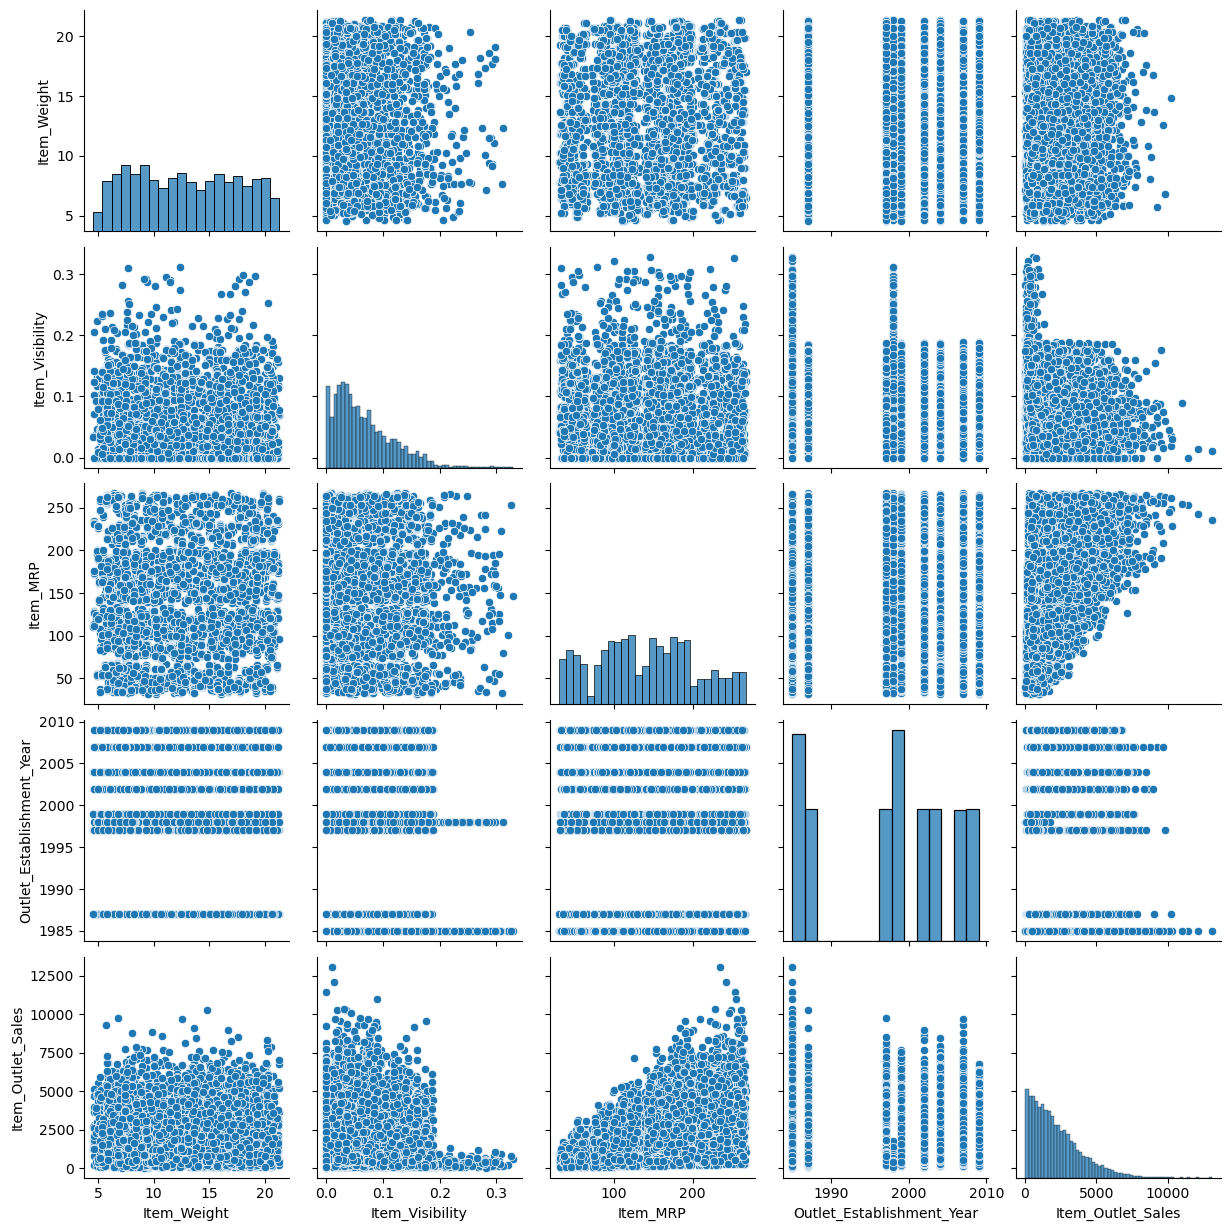

In [400]:
sns.pairplot(data = df)

# Handling Missing Values

In [401]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

There are two cols. which contains missing values

In [402]:
# Determine the average weight per item:
item_avg_weight = df.groupby(["Item_Identifier"])["Item_Weight"].mean()
item_avg_weight

Item_Identifier
DRA12    11.600
DRA24    19.350
DRA59     8.270
DRB01     7.390
DRB13     6.115
          ...  
NCZ30     6.590
NCZ41    19.850
NCZ42    10.500
NCZ53     9.600
NCZ54    14.650
Name: Item_Weight, Length: 1559, dtype: float64

In [403]:
#Get a boolean variable specifying missing Item_Weight values
miss_bool = df['Item_Weight'].isnull() 
miss_bool

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [404]:
miss_bool.sum()

1463

In [405]:
df.loc[miss_bool,'Item_Identifier']

7       FDP10
18      DRI11
21      FDW12
23      FDC37
29      FDC14
        ...  
8485    DRK37
8487    DRG13
8488    NCN14
8490    FDU44
8504    NCN18
Name: Item_Identifier, Length: 1463, dtype: object

Replacing the missing values of weight with the average weight of the same product

In [406]:
def impute_Item_Weight(df):
    # #Determine the average weight per item:
    item_avg_weight = df.groupby(["Item_Identifier"])["Item_Weight"].mean()
    item_avg_weight

    #Get a boolean variable specifying missing Item_Weight values
    miss_bool = df['Item_Weight'].isnull() 

    #Impute data and check #missing values before and after imputation to confirm
    print('Orignal #missing: %d'% sum(miss_bool))
    df.loc[miss_bool,'Item_Weight'] = df.loc[miss_bool,'Item_Identifier'].apply(lambda x: item_avg_weight.loc[x])
    print('Final #missing: %d'% sum(df['Item_Weight'].isnull()))

In [407]:
impute_Item_Weight(df)

Orignal #missing: 1463
Final #missing: 4


Even after replacing the weight values, the weight of 4 products is still missing. As we were replacing the values with the average weight of same product, 4 product are unique and don't have the any reference

In [408]:
#Get a boolean variable specifying missing Item_Weight values
miss_after_bool = df['Item_Weight'].isnull() 
miss_after_bool.sum()

4

In [409]:
miss_af = df.loc[miss_after_bool,'Item_Identifier']
miss_af

927     FDN52
1922    FDK57
4187    FDE52
5022    FDQ60
Name: Item_Identifier, dtype: object

These 4 Products are unique and we don't know the product weight.

In [410]:
# Displaying the Product having missing weight
df.loc[miss_after_bool,:]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


To deal with these missing values we simply ignore and delete the observation

In [411]:
df=df.loc[~miss_after_bool,:]

In [412]:
df.shape

(8519, 12)

Lets impute Outlet_Size with the mode of the Outlet_Size for the particular type of outlet.

In [413]:
def impute_Outlet_size(df):
    #Determing the mode for each
    outlet_size_mode = df.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]) )
    print('Mode for each Outlet_Type:')
    print(outlet_size_mode)
    
    #Convert to dictionary for easier mapping
    outlet_size_mode = outlet_size_mode.to_dict()

    #Get a boolean variable specifying missing Item_Weight values
    miss_bool = df['Outlet_Size'].isnull() 

    #Impute data and check #missing values before and after imputation to confirm
    print('\nOrignal #missing: %d'% sum(miss_bool))
    df.loc[miss_bool,'Outlet_Size'] = df.loc[miss_bool,'Outlet_Type'].map(outlet_size_mode)
    print('\nFinal #missing: %d'%sum(df['Outlet_Size'].isnull()))

In [414]:
impute_Outlet_size(df)

Mode for each Outlet_Type:
Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  

Orignal #missing: 2410

Final #missing: 0


In [415]:
df.to_csv("clean_1_train.csv",index = False)

Feature Correlation

In [416]:
corr_matrix = df.select_dtypes(include=[float, int]).corr()
corr_matrix

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.009173,0.025975,-0.013426,0.013168
Item_Visibility,-0.009173,1.000000,-0.001155,-0.074325,-0.128297
Item_MRP,0.025975,-0.001155,1.000000,0.004599,0.567803
Outlet_Establishment_Year,-0.013426,-0.074325,0.004599,1.000000,-0.049083
Item_Outlet_Sales,0.013168,-0.128297,0.567803,-0.049083,1.000000


<Axes: >

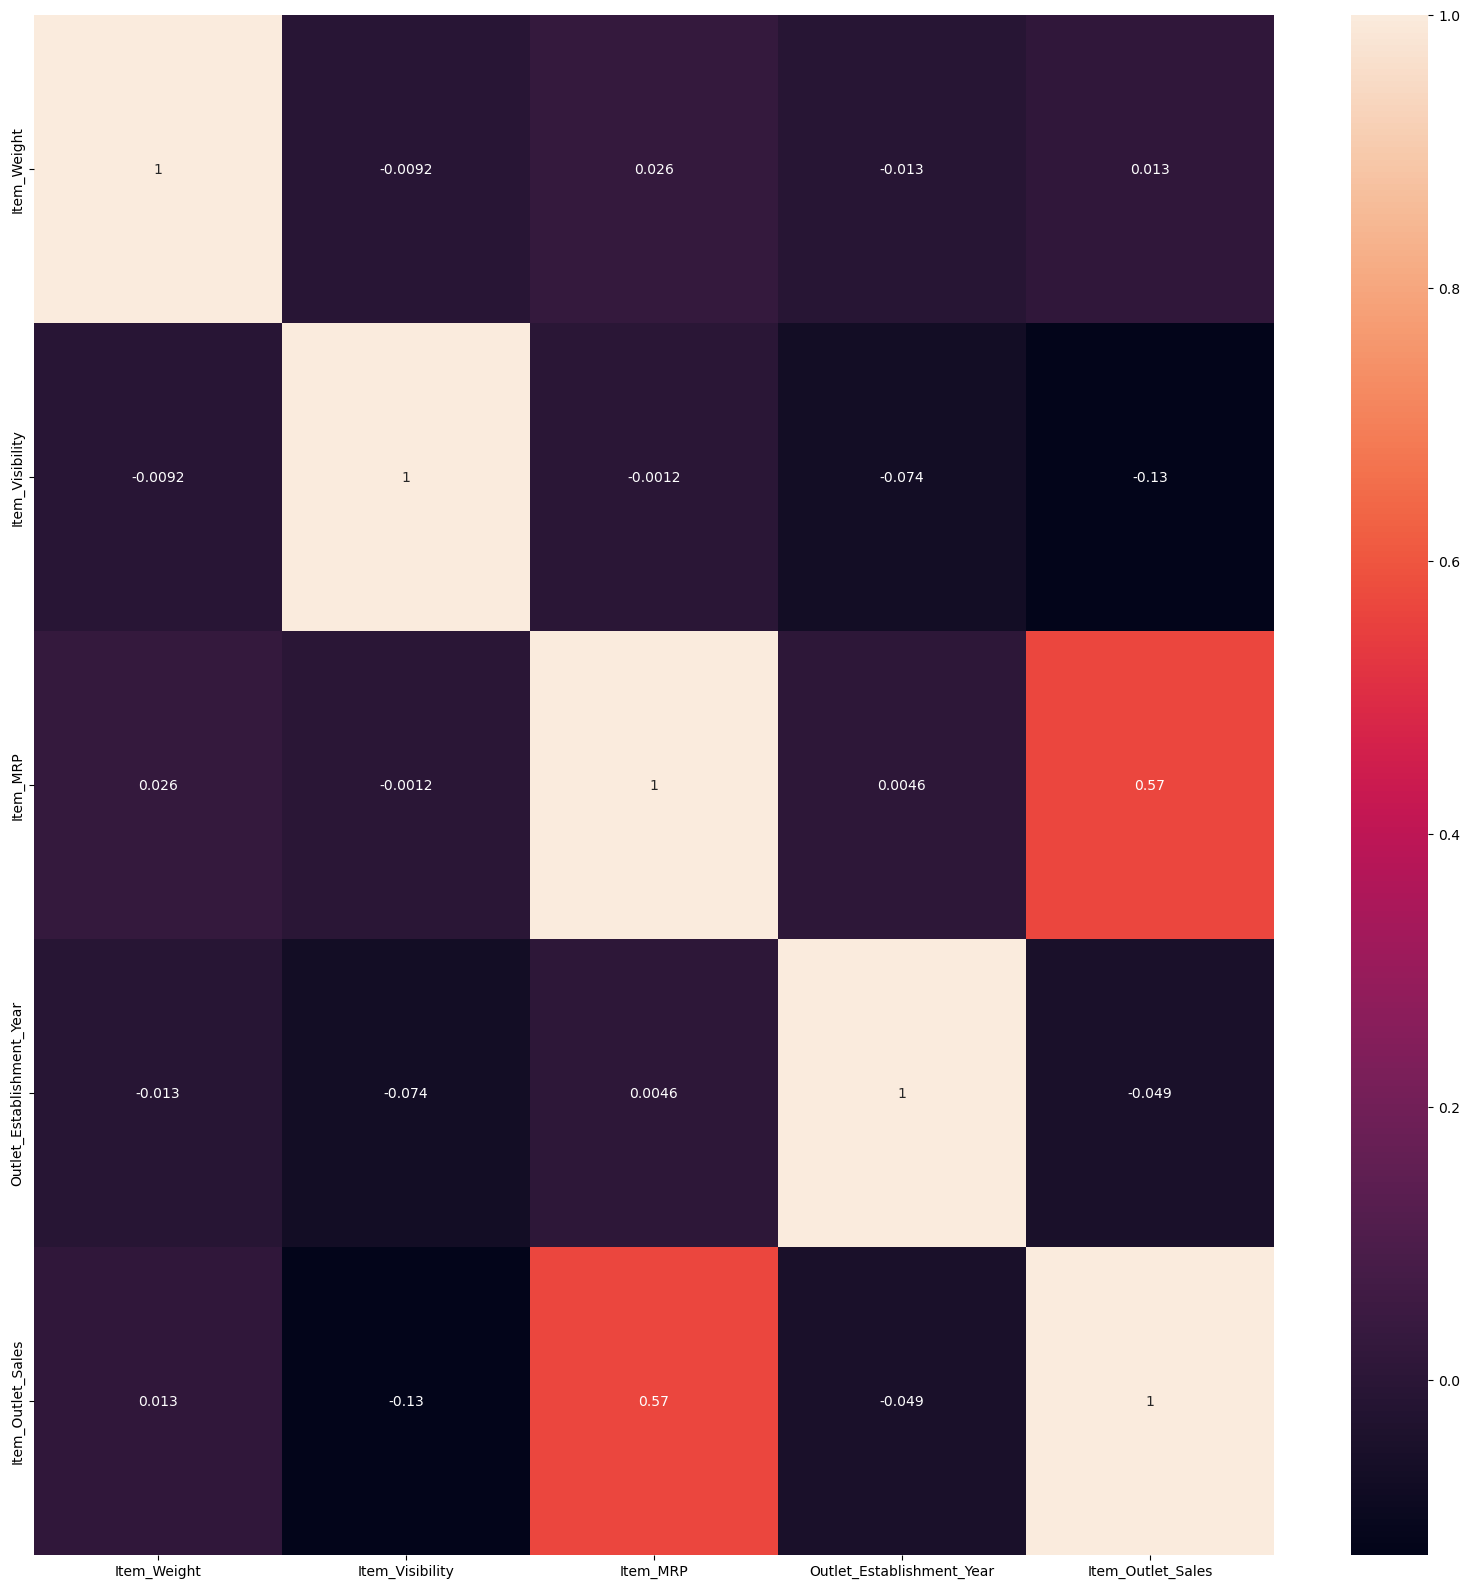

In [417]:
plt.figure(figsize = (20,20))
sns.heatmap(corr_matrix,annot = True)

We see that the Item_MRP is highly correlated with Item_outlet_Sales. Therefore,we want to compute the association of the target with each feature while adjusting for the effect of the remaining features.

This can be done using Univariante and Bivariante linear regression.

# Univariante Analysis

In [418]:
X=df['Item_MRP'].values.reshape(-1,1)
y=df['Item_Outlet_Sales']

In [419]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=24)

In [420]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6815, 1)
(1704, 1)
(6815,)
(1704,)


In [421]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [422]:
y_pred = lr_model.predict(X_train)

In [423]:
from sklearn.metrics import r2_score

score = r2_score(y_train,y_pred)
print("Score of Training:",100*score)

Score of Training: 32.031452064357325


In [424]:
from sklearn.metrics import mean_squared_error,make_scorer,mean_absolute_error
from sklearn.model_selection import cross_val_score

#Perform cross-validation:
cv_score = cross_val_score(lr_model,X_train, y_train, cv=20, scoring = make_scorer(mean_squared_error))
cv_score = np.sqrt(np.abs(cv_score))
    
#Print model report:
print("\nModel Report")
print("MAE : %.4g" % np.sqrt(mean_absolute_error(y_train,y_pred)))
print("RMSE : %.4g" % np.sqrt(mean_squared_error(y_train,y_pred)))
print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))


Model Report
MAE : 32.08
RMSE : 1400
CV Score : Mean - 1398 | Std - 79.86 | Min - 1229 | Max - 1494


# Polynomial Regression
### Create interaction features for the case study data using scikit-learn's PolynomialFeatures.

In [425]:
# importing libraries for polynomial transform
from sklearn.preprocessing import PolynomialFeatures
# for creating pipeline
from sklearn.pipeline import Pipeline
# creating pipeline and fitting it on data
Input=[('polynomial',PolynomialFeatures(degree=2)),('modal',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(X.reshape(-1,1),y)

Pipeline(steps=[('polynomial', PolynomialFeatures()),
                ('modal', LinearRegression())])

In [426]:
poly_pred=pipe.predict(X.reshape(-1,1))

In [427]:
from sklearn.metrics import r2_score

score = r2_score(y,poly_pred)
print(100*score)

32.24684888585043


In [428]:
from sklearn.metrics import mean_squared_error,make_scorer,mean_absolute_error
from sklearn.model_selection import cross_val_score

#Perform cross-validation:
cv_score = cross_val_score(lr_model,X_train, y_train, cv=20, scoring = make_scorer(mean_squared_error))
cv_score = np.sqrt(np.abs(cv_score))
    
#Print model report:
print("\nModel Report")
print("MAE : %.4g" % np.sqrt(mean_absolute_error(y_train,y_pred)))
print("RMSE : %.4g" % np.sqrt(mean_squared_error(y_train,y_pred)))
print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))


Model Report
MAE : 32.08
RMSE : 1400
CV Score : Mean - 1398 | Std - 79.86 | Min - 1229 | Max - 1494


# Bivariante Analysis

In [429]:
response_features = ['Item_Visibility','Item_MRP']

In [430]:
X=df[response_features].values
y=df['Item_Outlet_Sales']

In [431]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=24)

In [432]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6815, 2)
(1704, 2)
(6815,)
(1704,)


In [433]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [434]:
y_pred = lr_model.predict(X_train)

In [435]:
from sklearn.metrics import r2_score

score = r2_score(y_train,y_pred)
print(100*score)

33.468271103932814


In [436]:
from sklearn.metrics import mean_squared_error,make_scorer,mean_absolute_error
from sklearn.model_selection import cross_val_score

#Perform cross-validation:
cv_score = cross_val_score(lr_model,X_train, y_train, cv=20, scoring = make_scorer(mean_squared_error))
cv_score = np.sqrt(np.abs(cv_score))
    
#Print model report:
print("\nModel Report")
print("MAE : %.4g" % np.sqrt(mean_absolute_error(y_train,y_pred)))
print("RMSE : %.4g" % np.sqrt(mean_squared_error(y_train,y_pred)))
print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))


Model Report
MAE : 31.97
RMSE : 1385
CV Score : Mean - 1383 | Std - 79.89 | Min - 1220 | Max - 1495


# Polynomial Regression
### Create interaction features for the case study data using scikit-learn's PolynomialFeatures.

In [437]:
# creating pipeline and fitting it on data
Input=[('polynomial',PolynomialFeatures(degree=2)),('model',LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(X,y)

Pipeline(steps=[('polynomial', PolynomialFeatures()),
                ('model', LinearRegression())])

In [438]:
poly_pred=pipe.predict(X)

In [439]:
from sklearn.metrics import r2_score

score = r2_score(y,poly_pred)
print(100*score)

34.95958877773293


In [440]:
from sklearn.metrics import mean_squared_error,make_scorer,mean_absolute_error
from sklearn.model_selection import cross_val_score

#Perform cross-validation:
cv_score = cross_val_score(lr_model,X_train, y_train, cv=20, scoring = make_scorer(mean_squared_error))
cv_score = np.sqrt(np.abs(cv_score))
    
#Print model report:
print("\nModel Report")
print("MAE : %.4g" % np.sqrt(mean_absolute_error(y_train,y_pred)))
print("RMSE : %.4g" % np.sqrt(mean_squared_error(y_train,y_pred)))
print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))


Model Report
MAE : 31.97
RMSE : 1385
CV Score : Mean - 1383 | Std - 79.89 | Min - 1220 | Max - 1495


# Feature Engineering

In [441]:
# Displaying the mean sales by type of store.
df.pivot_table(values='Item_Outlet_Sales',index='Outlet_Type')

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,340.031198
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3695.781505


### Modify Item_Visibility
We noticed that the minimum value here is 0, which makes no practical sense.

In [442]:
def modify_item_visibility(df):
    #Determine average visibility of a product
    visibility_avg = df.pivot_table(values='Item_Visibility', index='Item_Identifier')

    #Impute 0 values with mean visibility of that product:
    miss_bool = (df['Item_Visibility'] == 0)

    print('Number of 0 values initially: %d'%sum(miss_bool))
    df.loc[miss_bool,'Item_Visibility'] = df.loc[miss_bool,'Item_Identifier'].apply(lambda x: visibility_avg.loc[x])
    print('Number of 0 values after modification: %d'%sum(df['Item_Visibility'] == 0))

In [443]:
modify_item_visibility(df)

Number of 0 values initially: 526
Number of 0 values after modification: 0


In [444]:
df["Item_Visibility"].describe()

count    8519.000000
mean        0.069652
std         0.049798
min         0.003575
25%         0.031114
50%         0.056919
75%         0.097132
max         0.328391
Name: Item_Visibility, dtype: float64

In [445]:
df['Item_Identifier']

0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
8518    FDF22
8519    FDS36
8520    NCJ29
8521    FDN46
8522    DRG01
Name: Item_Identifier, Length: 8519, dtype: object

In [446]:
print('Frequency of Categories for varible Item Type')
df['Item_Type'].value_counts()

Frequency of Categories for varible Item Type


Item_Type
Fruits and Vegetables    1232
Snack Foods              1199
Household                 910
Frozen Foods              855
Dairy                     681
Canned                    649
Baking Goods              647
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [447]:
df.groupby(["Item_Identifier","Item_Type"]).size()

Item_Identifier  Item_Type         
DRA12            Soft Drinks           6
DRA24            Soft Drinks           7
DRA59            Soft Drinks           8
DRB01            Soft Drinks           3
DRB13            Soft Drinks           5
                                      ..
NCZ30            Household             7
NCZ41            Health and Hygiene    5
NCZ42            Household             5
NCZ53            Health and Hygiene    5
NCZ54            Household             7
Length: 1555, dtype: int64

We can clearly observe that the First 2 characters of the Item ID is same for the One kind of Item Type. Example: DR is the code for Soft Drinks, NC is the code of Non- Consumable Products and FD is for Food products

### Create a broad category of Type of Item

In [448]:
def broad_item_type(df):
    #Get the first two characters of ID:
    df['Item_Type_Combined'] = df['Item_Identifier'].apply(lambda x: x[0:2])
    #Rename them to more intuitive categories:
    df['Item_Type_Combined'] = df['Item_Type_Combined'].map({'FD':'Food',
                                                                 'NC':'Non-Consumable',
                                                                 'DR':'Drinks'})
    print(df['Item_Type_Combined'].value_counts())

In [449]:
broad_item_type(df)

Item_Type_Combined
Food              6121
Non-Consumable    1599
Drinks             799
Name: count, dtype: int64


### Determine the years of operation of a store

In [450]:
df["Outlet_Establishment_Year"].value_counts()

Outlet_Establishment_Year
1985    1459
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: count, dtype: int64

In [451]:
df.groupby(["Outlet_Establishment_Year","Outlet_Identifier","Outlet_Type","Outlet_Location_Type"])["Item_Outlet_Sales"].mean()

Outlet_Establishment_Year  Outlet_Identifier  Outlet_Type        Outlet_Location_Type
1985                       OUT019             Grocery Store      Tier 1                   340.746838
                           OUT027             Supermarket Type3  Tier 3                  3695.781505
1987                       OUT013             Supermarket Type1  Tier 3                  2298.995256
1997                       OUT046             Supermarket Type1  Tier 1                  2277.844267
1998                       OUT010             Grocery Store      Tier 3                   339.351662
1999                       OUT049             Supermarket Type1  Tier 1                  2348.354635
2002                       OUT045             Supermarket Type1  Tier 2                  2192.384798
2004                       OUT035             Supermarket Type1  Tier 2                  2438.841866
2007                       OUT017             Supermarket Type1  Tier 2                  2340.675263
2009 

In [452]:
def cal_outlet_year(df):
    #Years:
    df['Outlet_Years'] = 2013 - df['Outlet_Establishment_Year']
    print(df['Outlet_Years'].describe())

In [453]:
cal_outlet_year(df)

count    8519.000000
mean       15.162108
std         8.369105
min         4.000000
25%         9.000000
50%        14.000000
75%        26.000000
max        28.000000
Name: Outlet_Years, dtype: float64


### Modify categories of Item_Fat_Content

We found typos and difference in representation in categories of Item_Fat_Content variable.

In [454]:
def modify_item_fat_content(data):
    #Change categories of low fat:
    print('Original Categories:')
    print(data['Item_Fat_Content'].value_counts())

    print('\nModified Categories:')
    data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                                 'reg':'Regular',
                                                                 'low fat':'Low Fat'})
    print(data['Item_Fat_Content'].value_counts())

In [455]:
modify_item_fat_content(df)

Original Categories:
Item_Fat_Content
Low Fat    5088
Regular    2886
LF          316
reg         117
low fat     112
Name: count, dtype: int64

Modified Categories:
Item_Fat_Content
Low Fat    5516
Regular    3003
Name: count, dtype: int64


We have corrected the typos and the difference in representation but some non-consumables as well and a fat-content should not be specified for them. So we can also create a separate category for such kind of observations.

In [456]:
def non_consumable_category(data):
    #Mark non-consumables as separate category in low_fat:
    data.loc[data['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
    print(data['Item_Fat_Content'].value_counts())

In [457]:
non_consumable_category(df)

Item_Fat_Content
Low Fat       3917
Regular       3003
Non-Edible    1599
Name: count, dtype: int64


In [458]:
def Item_Visibility_MeanRatio(data):
    #Get all Item_Visibility mean values for respective Item_Identifier
    visibility_item_avg = data.pivot_table(values='Item_Visibility',index='Item_Identifier')

    func = lambda x: x['Item_Visibility']/visibility_item_avg['Item_Visibility'][visibility_item_avg.index == x['Item_Identifier']][0]
    data['Item_Visibility'] = data.apply(func,axis=1).astype(float)
    data['Item_Visibility'].describe()

In [459]:
Item_Visibility_MeanRatio(df)

In [460]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined,Outlet_Years
0,FDA15,9.30,Low Fat,0.922960,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Food,14
1,DRC01,5.92,Regular,1.003057,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Drinks,4
2,FDN15,17.50,Low Fat,0.831990,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Food,14
3,FDX07,19.20,Regular,0.750000,Fruits and Vegetables,182.0950,OUT010,1998,{'Outlet_Size': 'Small'},Tier 3,Grocery Store,732.3800,Food,15
4,NCD19,8.93,Non-Edible,0.666667,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Non-Consumable,26


In [461]:
df.shape

(8519, 14)

# Numerical and One-Hot Coding of Categorical variables

In [462]:
from sklearn.preprocessing import LabelEncoder

def label_encoding(df):
    le = LabelEncoder()
    #New variable for outlet
    df['Outlet'] = le.fit_transform(df['Outlet_Identifier'])
    df['Outlet']
    var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
    le = LabelEncoder()
    for i in var_mod:
        df[i] = le.fit_transform(df[i])

In [463]:
for col in df.columns:
    if df[col].apply(lambda x: isinstance(x, dict)).any():
        df[col] = df[col].apply(lambda x: str(x) if isinstance(x, dict) else x)

In [464]:
label_encoding(df)

In [465]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined,Outlet_Years,Outlet
0,FDA15,9.30,0,0.922960,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380,1,14,9
1,DRC01,5.92,2,1.003057,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228,0,4,3
2,FDN15,17.50,0,0.831990,Meat,141.6180,OUT049,1999,1,0,1,2097.2700,1,14,9
3,FDX07,19.20,2,0.750000,Fruits and Vegetables,182.0950,OUT010,1998,3,2,0,732.3800,1,15,0
4,NCD19,8.93,1,0.666667,Household,53.8614,OUT013,1987,0,2,1,994.7052,2,26,1


In [466]:
df.shape

(8519, 15)

In [467]:
def One_hot_encoding(df):
    #One Hot Coding:
    df = pd.get_dummies(df, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_Combined','Outlet'],drop_first = True)
    
    return df

In [468]:
df = One_hot_encoding(df)

In [469]:
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_1,...,Item_Type_Combined_2,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.922960,Dairy,249.8092,OUT049,1999,3735.1380,14,False,...,False,False,False,False,False,False,False,False,False,True
1,DRC01,5.92,1.003057,Soft Drinks,48.2692,OUT018,2009,443.4228,4,False,...,False,False,False,True,False,False,False,False,False,False
2,FDN15,17.50,0.831990,Meat,141.6180,OUT049,1999,2097.2700,14,False,...,False,False,False,False,False,False,False,False,False,True
3,FDX07,19.20,0.750000,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,15,False,...,False,False,False,False,False,False,False,False,False,False
4,NCD19,8.93,0.666667,Household,53.8614,OUT013,1987,994.7052,26,True,...,True,True,False,False,False,False,False,False,False,False


In [470]:
df.shape

(8519, 30)

In [471]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
Outlet_Years                   int64
Item_Fat_Content_1              bool
Item_Fat_Content_2              bool
Outlet_Location_Type_1          bool
Outlet_Location_Type_2          bool
Outlet_Size_1                   bool
Outlet_Size_2                   bool
Outlet_Size_3                   bool
Outlet_Type_1                   bool
Outlet_Type_2                   bool
Outlet_Type_3                   bool
Item_Type_Combined_1            bool
Item_Type_Combined_2            bool
Outlet_1                        bool
Outlet_2                        bool
Outlet_3                        bool
Outlet_4                        bool
Outlet_5                        bool
Outlet_6                        bool
O

In [472]:
for col in df.columns:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype('uint8')

In [473]:
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_1,...,Item_Type_Combined_2,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.922960,Dairy,249.8092,OUT049,1999,3735.1380,14,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,1.003057,Soft Drinks,48.2692,OUT018,2009,443.4228,4,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.831990,Meat,141.6180,OUT049,1999,2097.2700,14,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.750000,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,15,0,...,0,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.666667,Household,53.8614,OUT013,1987,994.7052,26,1,...,1,1,0,0,0,0,0,0,0,0


In [474]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8519 entries, 0 to 8522
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8519 non-null   object 
 1   Item_Weight                8519 non-null   float64
 2   Item_Visibility            8519 non-null   float64
 3   Item_Type                  8519 non-null   object 
 4   Item_MRP                   8519 non-null   float64
 5   Outlet_Identifier          8519 non-null   object 
 6   Outlet_Establishment_Year  8519 non-null   int64  
 7   Item_Outlet_Sales          8519 non-null   float64
 8   Outlet_Years               8519 non-null   int64  
 9   Item_Fat_Content_1         8519 non-null   uint8  
 10  Item_Fat_Content_2         8519 non-null   uint8  
 11  Outlet_Location_Type_1     8519 non-null   uint8  
 12  Outlet_Location_Type_2     8519 non-null   uint8  
 13  Outlet_Size_1              8519 non-null   uint8  
 1

In [475]:
df.to_csv("clean_2_train.csv",index = False)

# Fitting a Linear Regression Model

In [476]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_1,Outlet_Location_Type_2,...,Item_Type_Combined_2,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
count,8519.000000,8519.000000,8519.000000,8519.000000,8519.000000,8519.000000,8519.000000,8519.000000,8519.000000,8519.000000,...,8519.000000,8519.000000,8519.000000,8519.000000,8519.000000,8519.000000,8519.000000,8519.000000,8519.000000,8519.000000
mean,12.875420,1.000000,141.010019,1997.837892,2181.188779,15.162108,0.187698,0.352506,0.326916,0.392886,...,0.187698,0.109403,0.108698,0.108933,0.061862,0.109403,0.109168,0.109050,0.109168,0.109168
std,4.646098,0.196805,62.283594,8.369105,1706.511093,8.369105,0.390494,0.477779,0.469114,0.488421,...,0.390494,0.312162,0.311278,0.311573,0.240918,0.312162,0.311868,0.311721,0.311868,0.311868
min,4.555000,0.636364,31.290000,1985.000000,33.290000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.785000,0.888335,93.844900,1987.000000,834.247400,9.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.650000,0.943167,143.047000,1999.000000,1794.331000,14.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16.850000,1.003298,185.676600,2004.000000,3100.630600,26.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,21.350000,1.819614,266.888400,2009.000000,13086.964800,28.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Created a list remove_cols to remove those columns which doesn't required for Model Building

In [477]:
remove_cols = [
    'Item_Identifier',
    'Item_Type',
    'Outlet_Identifier',
    'Outlet_Establishment_Year'
]
df = df.drop(remove_cols,axis =1)
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_1,...,Item_Type_Combined_2,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,9.30,0.922960,249.8092,3735.1380,14,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,5.92,1.003057,48.2692,443.4228,4,0,1,0,1,1,...,0,0,0,1,0,0,0,0,0,0
2,17.50,0.831990,141.6180,2097.2700,14,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,19.20,0.750000,182.0950,732.3800,15,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,8.93,0.666667,53.8614,994.7052,26,1,0,0,1,0,...,1,1,0,0,0,0,0,0,0,0


# Correlation Matrix

<Axes: >

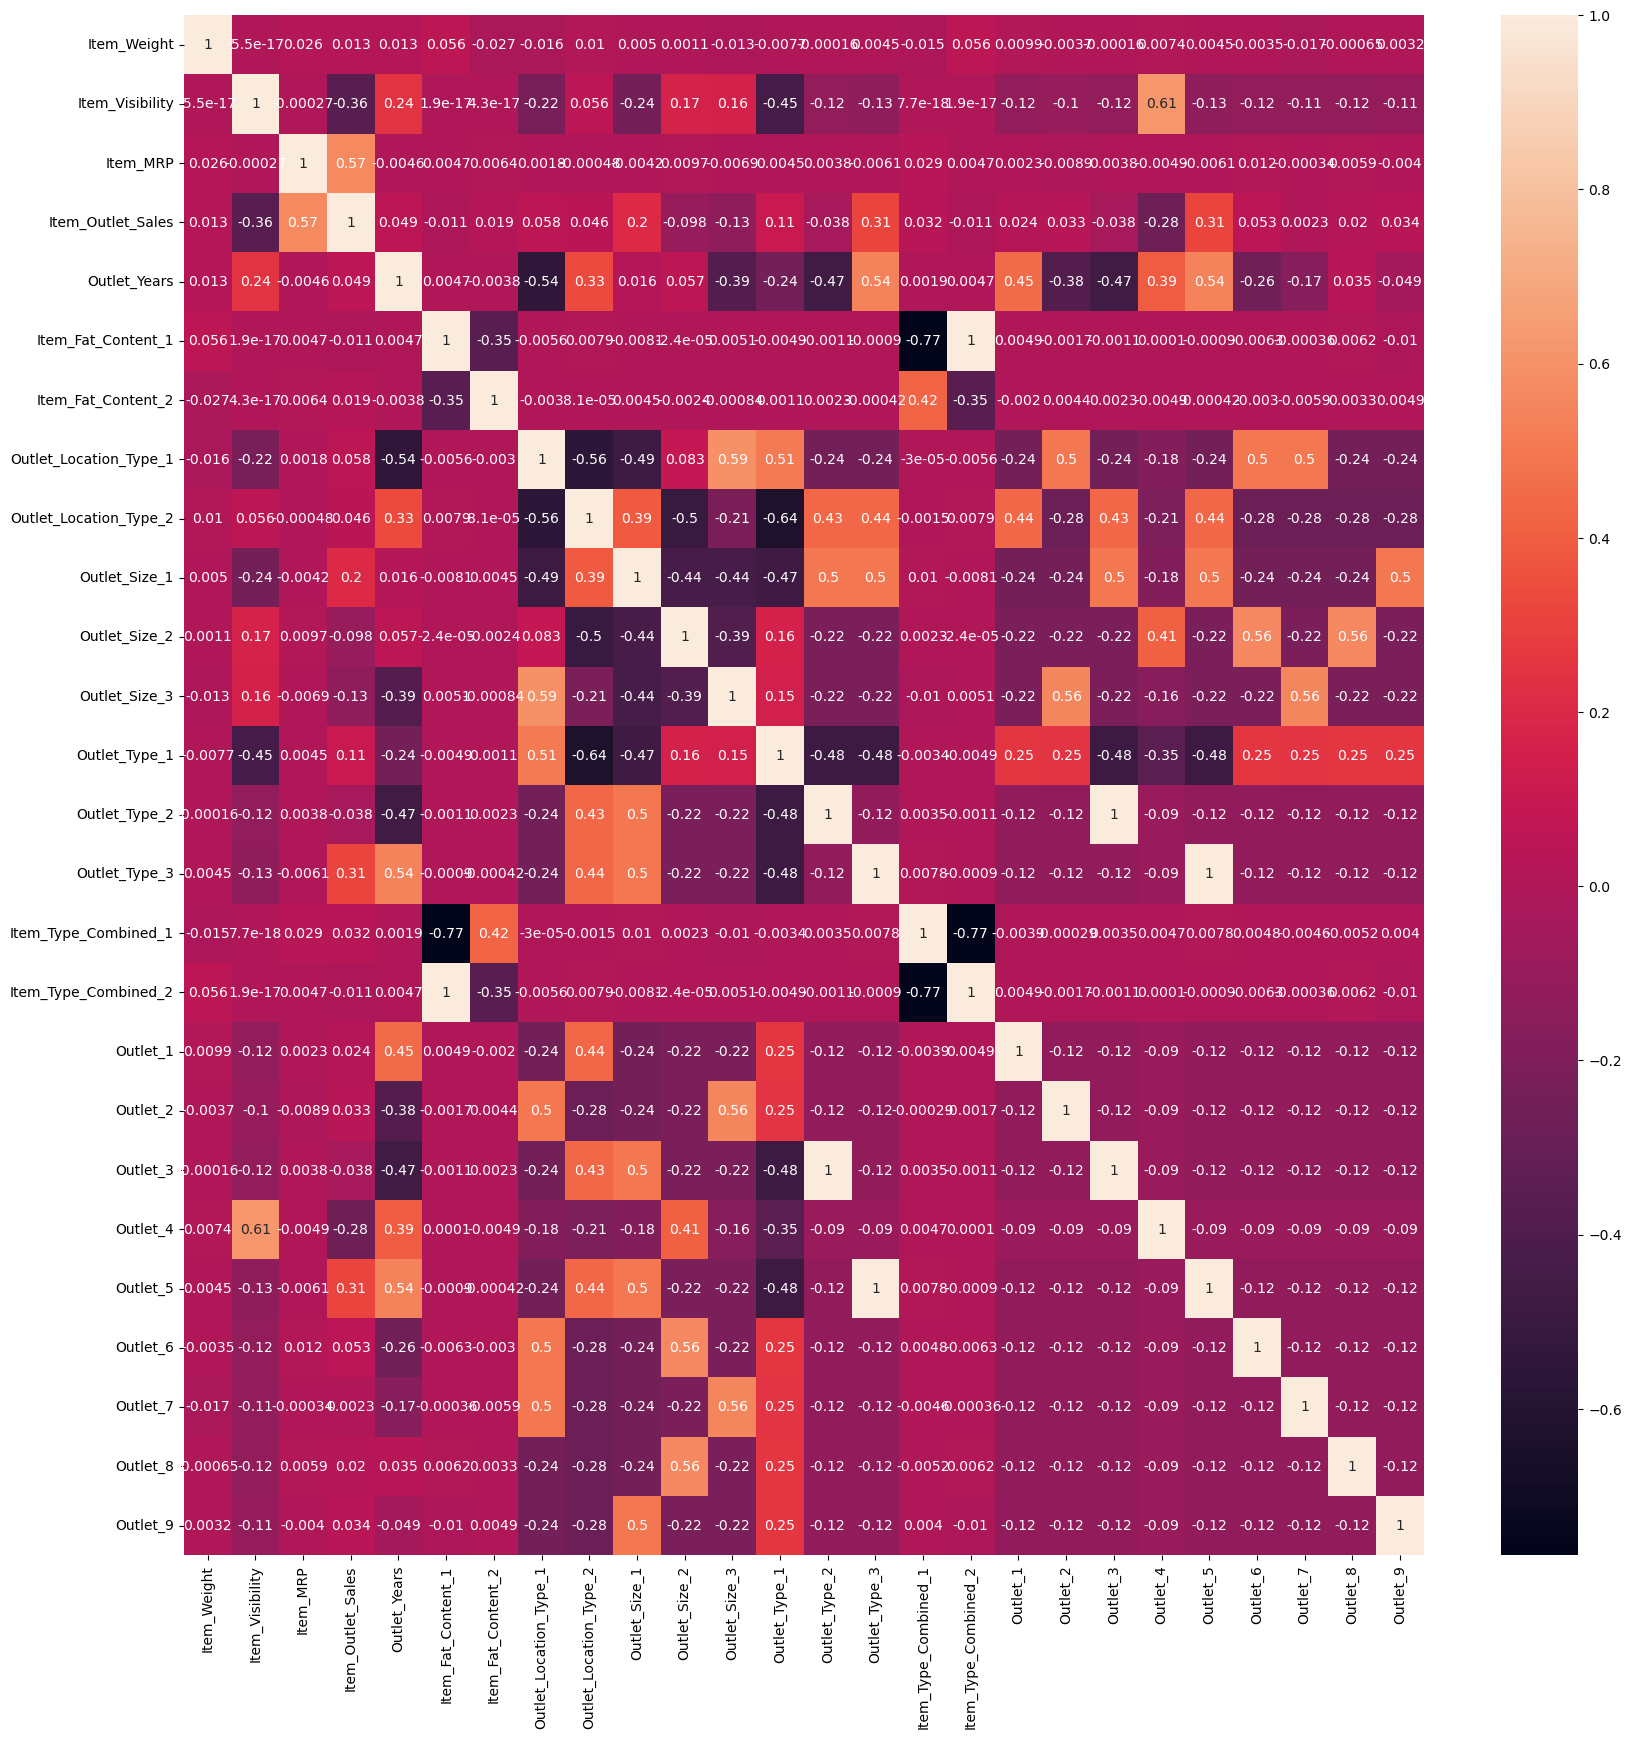

In [478]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(),annot = True)

### Data Preprocessing

In [479]:
y = df.Item_Outlet_Sales.values
X = df.drop('Item_Outlet_Sales',axis = 1)

In [480]:
print(X.shape,y.shape)

(8519, 25) (8519,)


In [481]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [482]:
cols = [ 
    'Item_Weight',
    'Item_Visibility',
    'Item_MRP',
    'Outlet_Years'
]
X[cols]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Years
0,9.300,0.922960,249.8092,14
1,5.920,1.003057,48.2692,4
2,17.500,0.831990,141.6180,14
3,19.200,0.750000,182.0950,15
4,8.930,0.666667,53.8614,26
...,...,...,...,...
8518,6.865,0.920247,214.5218,26
8519,8.380,1.000657,108.1570,11
8520,10.600,0.999512,85.1224,9
8521,7.210,1.031393,103.1332,4


In [483]:
X[cols]  =  sc.fit_transform(X[cols])

In [484]:
X.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Years,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_1,Outlet_Size_2,...,Item_Type_Combined_2,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,-0.769598,-0.391478,1.746938,-0.138865,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,-1.497133,0.015532,-1.489096,-1.333806,0,1,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
2,0.995427,-0.853739,0.009762,-0.138865,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,1.361347,-1.270366,0.659682,-0.019371,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.849240,-1.693822,-1.399305,1.295064,1,0,0,1,0,0,...,1,1,0,0,0,0,0,0,0,0


## Trained a Linear Regression model

In [485]:
from sklearn.linear_model import LinearRegression
#Training the Simple Linear Regression model on the Training set
model = LinearRegression()

In [486]:
model.fit(X,y)

LinearRegression()

In [487]:
#Predicting the Test set results
y_pred = model.predict(X)

In [488]:
from sklearn.metrics import r2_score,mean_squared_error

score = r2_score(y,y_pred)
print("Score of Training:",100*score)
print("RMSE : %.4g" % np.sqrt(mean_squared_error(y,y_pred)))

Score of Training: 56.33685063179977
RMSE : 1128


In [489]:
from sklearn.metrics import mean_squared_error,make_scorer,mean_absolute_error
from sklearn.model_selection import cross_val_score

#Perform cross-validation:
cv_score = cross_val_score(model,X, y, cv=20, scoring = make_scorer(mean_squared_error))
cv_score = np.sqrt(np.abs(cv_score))
    
#Print model report:
print("\nModel Report")
print("MAE : %.4g" % np.sqrt(mean_absolute_error(y,y_pred)))
print("RMSE : %.4g" % np.sqrt(mean_squared_error(y,y_pred)))
print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))


Model Report
MAE : 28.91
RMSE : 1128
CV Score : Mean - 1129 | Std - 42.71 | Min - 1075 | Max - 1209


In [490]:
model.coef_

array([ 2.37175968e-01, -4.02989245e+00,  9.68803432e+02,  6.72780607e+01,
       -5.32525951e+00,  4.17085934e+01,  6.51308835e+02, -6.68026007e+01,
        7.01601053e+02, -2.23526192e+02, -7.02309208e+02,  9.24233246e+02,
        1.57925936e+02,  9.25116908e+02,  1.52546816e+01, -5.32525951e+00,
        2.24234347e+02,  4.41719626e+02,  1.57925936e+02, -6.33196298e+02,
        9.25116908e+02, -2.04617493e+01,  2.30050958e+02,  4.30131855e+02,
       -3.81441792e+02])

<Axes: title={'center': 'Model Coefficients'}>

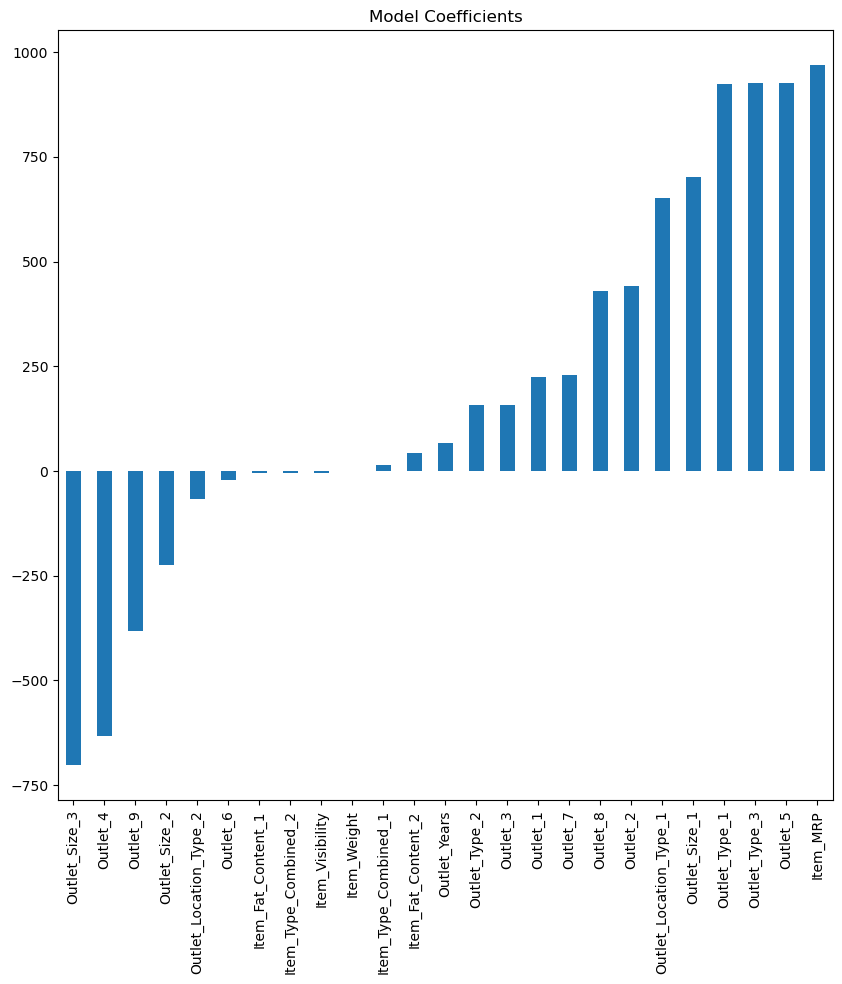

In [491]:
coef2 = pd.Series(model.coef_ ,X.columns).sort_values()
plt.figure(figsize = (10,10))
coef2.plot(kind='bar', title='Model Coefficients')

# Regularized Linear Regression

In [492]:
from sklearn.linear_model import Ridge
model_ridge = Ridge(alpha=0.05)

In [493]:
model_ridge.fit(X, y)

Ridge(alpha=0.05)

In [494]:
#Predicting the Test set results
y_pred = model_ridge.predict(X)

In [495]:
score = r2_score(y,y_pred)
print("Score of Training:",100*score)
print("RMSE : %.4g" % np.sqrt(mean_squared_error(y,y_pred)))

Score of Training: 56.336850440750254
RMSE : 1128


In [496]:
#Perform cross-validation:
cv_score = cross_val_score(model,X, y, cv=20, scoring = make_scorer(mean_squared_error))
cv_score = np.sqrt(np.abs(cv_score))
    
#Print model report:
print("\nModel Report")
print("MAE : %.4g" % np.sqrt(mean_absolute_error(y,y_pred)))
print("RMSE : %.4g" % np.sqrt(mean_squared_error(y,y_pred)))
print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))


Model Report
MAE : 28.91
RMSE : 1128
CV Score : Mean - 1129 | Std - 42.71 | Min - 1075 | Max - 1209


<Axes: title={'center': 'Model Coefficients'}>

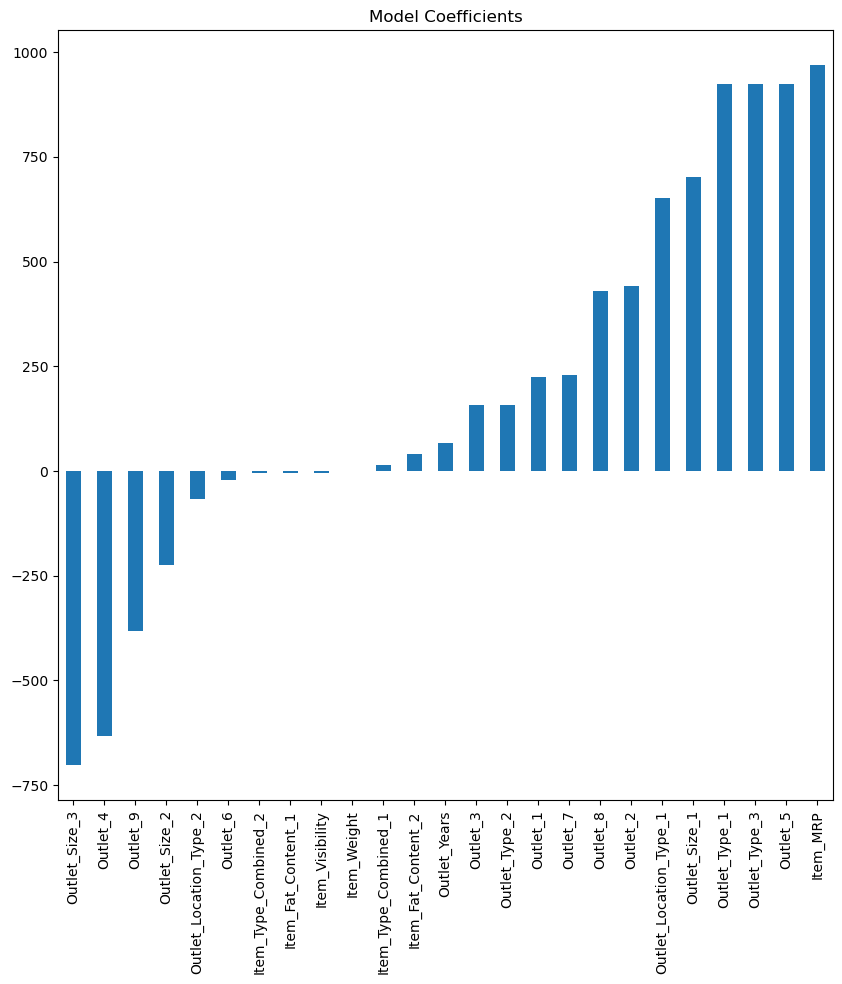

In [497]:
coef2 = pd.Series(model_ridge.coef_ ,X.columns).sort_values()
plt.figure(figsize = (10,10))
coef2.plot(kind='bar', title='Model Coefficients')

# Decision Tree Regression Model

In [498]:
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_1,...,Item_Type_Combined_2,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,9.30,0.922960,249.8092,3735.1380,14,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,5.92,1.003057,48.2692,443.4228,4,0,1,0,1,1,...,0,0,0,1,0,0,0,0,0,0
2,17.50,0.831990,141.6180,2097.2700,14,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,19.20,0.750000,182.0950,732.3800,15,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,8.93,0.666667,53.8614,994.7052,26,1,0,0,1,0,...,1,1,0,0,0,0,0,0,0,0


In [499]:
y = df.Item_Outlet_Sales.values
X = df.drop('Item_Outlet_Sales',axis = 1)

In [500]:
print(X.shape,y.shape)

(8519, 25) (8519,)


### Training

In [501]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()

#### List of parameters for hyperparameter tuning

In [502]:
param = {
    'max_depth':[6,9,12,15],
    'min_samples_leaf':[10,50,100,150]
}

### Hyperparameter optimization using RandomizedSearchCV

In [503]:
from sklearn.metrics import mean_squared_error,make_scorer
from sklearn.model_selection import RandomizedSearchCV
random_search=RandomizedSearchCV(DT,param_distributions=param,n_iter=5,scoring=make_scorer(mean_squared_error),n_jobs=-1,cv=5,verbose=3)

In [504]:
random_search.fit(X,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_iter=5, n_jobs=-1,
                   param_distributions={'max_depth': [6, 9, 12, 15],
                                        'min_samples_leaf': [10, 50, 100, 150]},
                   scoring=make_scorer(mean_squared_error), verbose=3)

In [505]:
means = random_search.cv_results_['mean_test_score']
params = random_search.cv_results_['params']
for mean, param in zip(means, params):
    print("%f with: %r" % (mean, param))
    if mean == min(means):
        print('Best parameters with the minimum Mean Square Error are:',param)

1242736.894774 with: {'min_samples_leaf': 50, 'max_depth': 9}
1252675.785923 with: {'min_samples_leaf': 50, 'max_depth': 12}
1234150.713856 with: {'min_samples_leaf': 100, 'max_depth': 15}
1233420.301400 with: {'min_samples_leaf': 100, 'max_depth': 9}
Best parameters with the minimum Mean Square Error are: {'min_samples_leaf': 100, 'max_depth': 9}
1298395.958182 with: {'min_samples_leaf': 10, 'max_depth': 9}


In [506]:
DT = DecisionTreeRegressor(min_samples_leaf=100, max_depth=12)

In [507]:
DT.fit(X,y)

DecisionTreeRegressor(max_depth=12, min_samples_leaf=100)

In [508]:
y_pred = DT.predict(X)

In [509]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

score = r2_score(y,y_pred)
print("Score:",100*score)
print("MAE : %.4g" % np.sqrt(mean_absolute_error(y,y_pred)))
print("RMSE : %.4g" % np.sqrt(mean_squared_error(y,y_pred)))

Score: 60.33794156728154
MAE : 27.46
RMSE : 1075


In [510]:
from sklearn.metrics import mean_squared_error,make_scorer,mean_absolute_error
from sklearn.model_selection import cross_val_score

#Perform cross-validation:
cv_score = cross_val_score(DT,X, y, cv=20, scoring = make_scorer(mean_squared_error))
cv_score = np.sqrt(np.abs(cv_score))
    
#Print model report:
print("\nModel Report")
print("MAE : %.4g" % np.sqrt(mean_absolute_error(y,y_pred)))
print("RMSE : %.4g" % np.sqrt(mean_squared_error(y,y_pred)))
print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))


Model Report
MAE : 27.46
RMSE : 1075
CV Score : Mean - 1104 | Std - 48.69 | Min - 1025 | Max - 1238


# Random Forest Regression Model

In [511]:
df.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_1,Item_Fat_Content_2,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_1,...,Item_Type_Combined_2,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,9.30,0.922960,249.8092,3735.1380,14,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,5.92,1.003057,48.2692,443.4228,4,0,1,0,1,1,...,0,0,0,1,0,0,0,0,0,0
2,17.50,0.831990,141.6180,2097.2700,14,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,19.20,0.750000,182.0950,732.3800,15,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,8.93,0.666667,53.8614,994.7052,26,1,0,0,1,0,...,1,1,0,0,0,0,0,0,0,0


In [512]:
df.shape

(8519, 26)

In [513]:
y = df.Item_Outlet_Sales.values
X = df.drop('Item_Outlet_Sales',axis = 1)
print(X.shape,y.shape)

(8519, 25) (8519,)


### Training

In [514]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

### List of parameters for hyperparameter tuning

In [515]:
param = {
    'max_depth':[3,6,9,12],
    'n_estimators' : [10,50,100,200] 
}

### Hyperparameter optimization using RandomizedSearchCV

In [516]:
from sklearn.metrics import mean_squared_error,make_scorer
from sklearn.model_selection import RandomizedSearchCV
random_search=RandomizedSearchCV(rf,param_distributions=param,n_iter=5,scoring=make_scorer(mean_squared_error),n_jobs=-1,cv=5,verbose=3)

In [517]:
random_search.fit(X,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=5, n_jobs=-1,
                   param_distributions={'max_depth': [3, 6, 9, 12],
                                        'n_estimators': [10, 50, 100, 200]},
                   scoring=make_scorer(mean_squared_error), verbose=3)

In [518]:
means = random_search.cv_results_['mean_test_score']
params = random_search.cv_results_['params']
for mean, param in zip(means, params):
    print("%f with: %r" % (mean, param))
    if mean == min(means):
        print('Best parameters with the minimum Mean Square Error are:',param)

1196314.547213 with: {'n_estimators': 100, 'max_depth': 6}
Best parameters with the minimum Mean Square Error are: {'n_estimators': 100, 'max_depth': 6}
1200909.254267 with: {'n_estimators': 50, 'max_depth': 6}
1399478.513225 with: {'n_estimators': 10, 'max_depth': 3}
1234203.781130 with: {'n_estimators': 10, 'max_depth': 9}
1209384.552272 with: {'n_estimators': 10, 'max_depth': 6}


### Evaluating the model for Train and Test set

In [519]:
rf = RandomForestRegressor(
    n_estimators=50, max_depth=6,
)

In [520]:
rf.fit(X,y)

RandomForestRegressor(max_depth=6, n_estimators=50)

In [521]:
y_pred = rf.predict(X)

In [522]:
score = r2_score(y,y_pred)
print("Score:",100*score)
print("RMSE : %.4g" % np.sqrt(mean_squared_error(y,y_pred)))

Score: 61.53394502902771
RMSE : 1058


In [523]:
from sklearn.metrics import mean_squared_error,make_scorer,mean_absolute_error
from sklearn.model_selection import cross_val_score

#Perform cross-validation:
cv_score = cross_val_score(rf,X, y, cv=20, scoring = make_scorer(mean_squared_error))
cv_score = np.sqrt(np.abs(cv_score))
    
#Print model report:
print("\nModel Report")
print("MAE : %.4g" % np.sqrt(mean_absolute_error(y,y_pred)))
print("RMSE : %.4g" % np.sqrt(mean_squared_error(y,y_pred)))
print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))


Model Report
MAE : 27.3
RMSE : 1058
CV Score : Mean - 1090 | Std - 47.8 | Min - 1019 | Max - 1210
